In [ ]:
import sys
sys.path.insert(1, '/redacted/path/hippunfold_toolbox/hippunfold_toolbox')
sys.path.insert(1, '/redacted/path/Hippo_Spin_Testing')
import plotting
from hippo_spin_testing import spin_test
import nibabel as nib
import numpy as np
from pathlib import Path
import utils
import matplotlib.pyplot as plt
resourcesdir=str(Path(utils.__file__).parents[1]) + '/resources'

## Starting with the spin test of the t-statistic maps with maps derived from ex vivo MRI, histology, and PET

### Note that the non t-statistic maps are at different surface densities, so first performing an interpolation to match surface densities

In [ ]:
metrics = ['fneurite','fsoma','fe','R','ODI','wic','b500_1200_MD','gyrification','thickness','AP','PD','IO']

qR1 = nib.load(f'/redacted/path/MRI-9p4T-qR1_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii').agg_data()
qR1 = utils.density_interp('unfoldiso','0p5mm',qR1, label='hipp')[0]
qT1 = nib.load(f'/redacted/path/MRI-7T-qT1_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii').agg_data()
bieloschowsky = nib.load(f'/redacted/path/histology-Bieloschowsky_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii').agg_data()
bieloschowsky = utils.density_interp('unfoldiso','0p5mm',bieloschowsky, label='hipp')[0]
SV2Amarker = nib.load(f'/redacted/path/source-finnema2016_hemi-L_desc-ucbj_SV2Asynapse_space-MNI152_den-0p5mm_label-hipp_midthickness_feature.shape.gii').agg_data()
calbindin = nib.load(f'/redacted/path/histology-Calbindin_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii').agg_data()
calbindin = utils.density_interp('unfoldiso','0p5mm',calbindin, label='hipp')[0]
calretinin = nib.load(f'/redacted/path/histology-Calretinin_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii').agg_data()
calretinin = utils.density_interp('unfoldiso','0p5mm',calretinin, label='hipp')[0]
parvalbumin = nib.load(f'/redacted/path/histology-Parvalbumin_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii').agg_data()
parvalbumin = utils.density_interp('unfoldiso','0p5mm',parvalbumin, label='hipp')[0]

hippomap_metric = np.c_[qR1,bieloschowsky,SV2Amarker,calbindin,calretinin,parvalbumin]

## Below is the spin test of each t-statistic map with all other maps

### fneurite t-stat

/cubric/data/c23087627/miniconda3/envs/venv_all/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


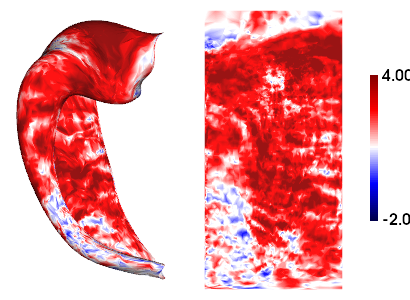

In [4]:
fneurite_tstat = nib.load(f'{tstat_dir}/fneurite_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()
plotting.surfplot_canonical_foldunfold(fneurite_tstat,color_range=(-2,4),color_bar=('right'),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

In [ ]:
fneurite_compare = np.c_[qR1,bieloschowsky,SV2Amarker,calretinin,calbindin,parvalbumin]
fneurite_robs = np.empty((fneurite_compare.shape[1]))
fneurite_pval = np.empty((fneurite_compare.shape[1]))

for ii in range(fneurite_compare.shape[1]):
    [null,perm,pval,robs] = spin_test.spin_test(fneurite_compare[:,ii],fneurite_tstat,2500,metric='pearson',space='orig')
    fneurite_robs[ii] = robs
    fneurite_pval[ii] = pval

In [14]:
fneurite_robs = [0.32788985766108547,0.10685342933815863,0.37234250828927407,-0.16288044020448467,-0.24329043494692745,-0.3567649742592991]
fneurite_pval = [0.0104,0.5796,0.0172,0.2984,0.0712,0.0072]

In [ ]:
fnmetric = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']
for ii in range(len(fnmetric)):
    print(f'{fnmetric[ii]} Robs={fneurite_robs[ii]}, {fnmetric[ii]} pval={fneurite_pval[ii]}')

### NODDI VIC t-stat

/cubric/data/c23087627/miniconda3/envs/venv_all/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


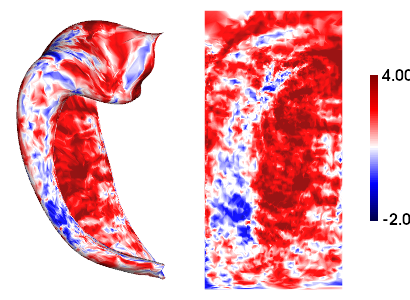

In [ ]:
vic_tstat = nib.load(f'/redacted/path/wic_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()
plotting.surfplot_canonical_foldunfold(vic_tstat,color_range=(-2,4),color_bar=('right'),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

In [45]:
vic_compare = np.c_[qR1,bieloschowsky,SV2Amarker,calretinin,calbindin,parvalbumin]
vic_robs = np.empty((vic_compare.shape[1]))
vic_pval = np.empty((vic_compare.shape[1]))

for ii in range(vic_compare.shape[1]):
    [null,perm,pval,robs] = spin_test.spin_test(vic_compare[:,ii],vic_tstat,2500,metric='pearson',space='orig')
    vic_robs[ii] = robs
    vic_pval[ii] = pval


In [15]:
vic_robs = [0.42379746641973415,0.1777985747951476,0.17711115145181944,-0.3356252538991837,-0.34194716217104215,-0.3690556962103745]
vic_pval = [0.0016,0.1488,0.3728,0.044,0.0164,0.0088]

In [46]:
vicmetric = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']
for ii in range(len(vicmetric)):
    print(f'{vicmetric[ii]} Robs={vic_robs[ii]}, {vicmetric[ii]} pval={vic_pval[ii]}')

qR1 Robs=0.42379746641973415, qR1 pval=0.0016
bielschowsky Robs=0.1777985747951476, bielschowsky pval=0.1488
SV2Amarker Robs=0.17711115145181944, SV2Amarker pval=0.3728
calretinin Robs=-0.3356252538991837, calretinin pval=0.044
calbindin Robs=-0.34194716217104215, calbindin pval=0.0164
parvalbumin Robs=-0.3690556962103745, parvalbumin pval=0.0088


### ODI t-stat

/cubric/data/c23087627/miniconda3/envs/venv_all/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


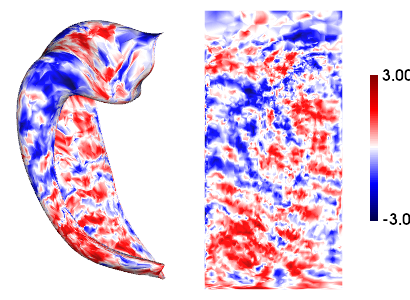

In [ ]:
ODI_tstat = nib.load(f'/redacted/path/ODI_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()
plotting.surfplot_canonical_foldunfold(ODI_tstat,color_bar=('right'),color_range=(-3,3),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

In [6]:
ODI_compare = np.c_[qR1,bieloschowsky,SV2Amarker,calretinin,calbindin,parvalbumin]
ODI_robs = np.empty((ODI_compare.shape[1]))
ODI_pval = np.empty((ODI_compare.shape[1]))

for ii in range(ODI_compare.shape[1]):
    [null,perm,pval,robs] = spin_test.spin_test(ODI_compare[:,ii],ODI_tstat,2500,metric='pearson',space='orig')
    ODI_robs[ii] = robs
    ODI_pval[ii] = pval

In [16]:
ODI_robs = [-0.08041960003083887,0.08412923670259338,-0.02540562599697005,-0.12920755862584987,-0.08682680635270862,0.0804102154475773]
ODI_pval = [0.4576,0.4592,0.8656,0.2944,0.4148,0.5156]

In [7]:
ODImetric = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']
for ii in range(len(ODImetric)):
    print(f'{ODImetric[ii]} Robs={ODI_robs[ii]}, {ODImetric[ii]} pval={ODI_pval[ii]}')

qR1 Robs=-0.08041960003083887, qR1 pval=0.4576
bielschowsky Robs=0.08412923670259338, bielschowsky pval=0.4592
SV2Amarker Robs=-0.02540562599697005, SV2Amarker pval=0.8656
calretinin Robs=-0.12920755862584987, calretinin pval=0.2944
calbindin Robs=-0.08682680635270862, calbindin pval=0.4148
parvalbumin Robs=0.0804102154475773, parvalbumin pval=0.5156


### MD t-stat

/cubric/data/c23087627/miniconda3/envs/venv_all/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


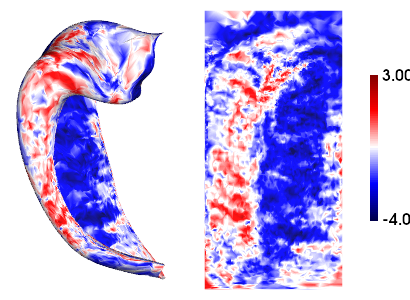

In [ ]:
MD_tstat = nib.load(f'/redacted/path/b500_1200_MD_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()
plotting.surfplot_canonical_foldunfold(MD_tstat,color_bar=('right'),color_range=(-4,3),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

In [10]:
MD_compare = np.c_[qR1,bieloschowsky,SV2Amarker,calretinin,calbindin,parvalbumin]
MD_robs = np.empty((MD_compare.shape[1]))
MD_pval = np.empty((MD_compare.shape[1]))

for ii in range(MD_compare.shape[1]):
    [null,perm,pval,robs] = spin_test.spin_test(MD_compare[:,ii],MD_tstat,2500,metric='pearson',space='orig')
    MD_robs[ii] = robs
    MD_pval[ii] = pval

In [17]:
MD_robs = [-0.42232496354228677,-0.189964212887594,-0.02401798133212632,0.37867425369959906,0.36120043497723564,0.30992740273742236]
MD_pval = [0.0024,0.0504,0.9264,0.0436,0.0292,0.03]

In [12]:
MDmetric = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']
for ii in range(len(MDmetric)):
    print(f'{MDmetric[ii]} Robs={MD_robs[ii]}, {MDmetric[ii]} pval={MD_pval[ii]}')

qR1 Robs=-0.42232496354228677, qR1 pval=0.0024
bielschowsky Robs=-0.189964212887594, bielschowsky pval=0.0504
SV2Amarker Robs=-0.02401798133212632, SV2Amarker pval=0.9264
calretinin Robs=0.37867425369959906, calretinin pval=0.0436
calbindin Robs=0.36120043497723564, calbindin pval=0.0292
parvalbumin Robs=0.30992740273742236, parvalbumin pval=0.03


### Long-axis diffusion t-stat

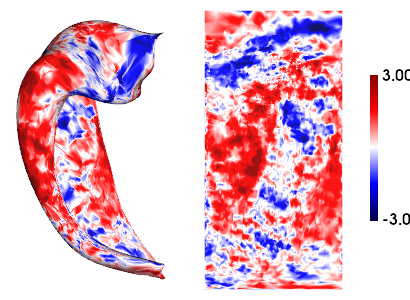

In [ ]:
AP_tstat = nib.load(f'/redacted/path/AP_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()
plotting.surfplot_canonical_foldunfold(AP_tstat,color_range=(-3,3),color_bar=('right'),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

In [ ]:
AP_compare = np.c_[qR1,bieloschowsky,SV2Amarker,calretinin,calbindin,parvalbumin]
AP_robs = np.empty((AP_compare.shape[1]))
AP_pval = np.empty((AP_compare.shape[1]))

for ii in range(AP_compare.shape[1]):
    [null,perm,pval,robs] = spin_test.spin_test(AP_compare[:,ii],AP_tstat,2500,metric='pearson',space='orig')
    AP_robs[ii] = robs
    AP_pval[ii] = pval


In [ ]:
AP_robs = [-0.016599618661008977,0.06567033433466395,-0.02090902736363854,0.03382190415962682,-0.008157729347962647,0.045917779659810934]
AP_pval = [0.864,0.5328,0.9028,0.8096,0.952,0.7272]

In [ ]:
APmetric = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']
for ii in range(len(APmetric)):
    print(f'{APmetric[ii]} Robs={AP_robs[ii]}, {APmetric[ii]} pval={AP_pval[ii]}')

### Radiality t-stat

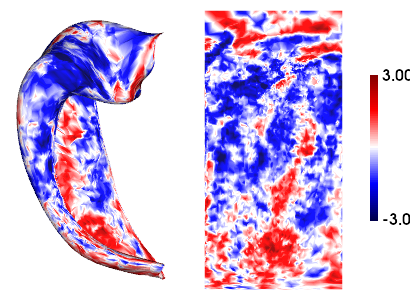

In [ ]:
IO_tstat = nib.load(f'/redacted/path/IO_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()
plotting.surfplot_canonical_foldunfold(IO_tstat,color_range=(-3,3),color_bar=('right'),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

In [ ]:
IO_compare = np.c_[qR1,bieloschowsky,SV2Amarker,calretinin,calbindin,parvalbumin]
IO_robs = np.empty((IO_compare.shape[1]))
IO_pval = np.empty((IO_compare.shape[1]))

for ii in range(IO_compare.shape[1]):
    [null,perm,pval,robs] = spin_test.spin_test(IO_compare[:,ii],IO_tstat,2500,metric='pearson',space='orig')
    IO_robs[ii] = robs
    IO_pval[ii] = pval

In [ ]:
IO_robs = [-0.09716505283359514,0.04893298576727183,-0.09329334852367065,-0.14511098755116414,-0.07098027687433753,0.047638384473612586]
IO_pval = [0.484,0.796,0.6524,0.2936,0.5544,0.786]

In [ ]:
IOmetric = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']
for ii in range(len(IOmetric)):
    print(f'{IOmetric[ii]} Robs={IO_robs[ii]}, {IOmetric[ii]} pval={IO_pval[ii]})')

### fextracellular t-stat

/cubric/data/c23087627/miniconda3/envs/venv_all/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


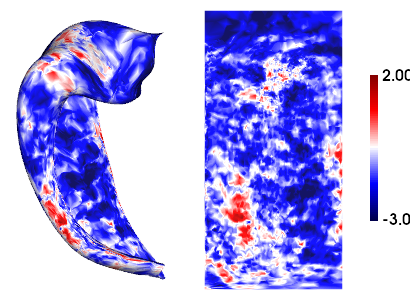

In [ ]:
fe_tstat = nib.load(f'/redacted/path/fe_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()
plotting.surfplot_canonical_foldunfold(fe_tstat,color_range=(-3,2),color_bar=('right'),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

In [ ]:
fe_compare = np.c_[qR1,bieloschowsky,SV2Amarker,calretinin,calbindin,parvalbumin]
fe_robs = np.empty((fe_compare.shape[1]))
fe_pval = np.empty((fe_compare.shape[1]))

for ii in range(fe_compare.shape[1]):
    [null,perm,pval,robs] = spin_test.spin_test(fe_compare[:,ii],fe_tstat,2500,metric='pearson',space='orig')
    fe_robs[ii] = robs
    fe_pval[ii] = pval

In [ ]:
fe_robs = [-0.2426122058854177,0.006117220744793216,0.0901395069702593,0.04787517197485931,0.09079565084654742,0.18132376630096125]
fe_pval = [0.0124,0.9576,0.5088,0.7004,0.4048,0.1532]

In [ ]:
femetric = ['qR1','T1/T2','bielschowsky','PLItrans','SV2Amarker','calretinin','calbindin','parvalbumin']
for ii in range(len(femetric)):
    print(f'{femetric[ii]} Robs={fe_robs[ii]}, {femetric[ii]} pval={fe_pval[ii]})')

# Making heatmaps for all the correlations

In [19]:
newmetric = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']

robsall = np.c_[fneurite_robs,vic_robs,fe_robs,MD_robs,ODI_robs]
pall = np.c_[fneurite_pval,vic_pval,fe_pval,MD_pval,ODI_pval]

In [20]:
robsall.shape

(6, 5)

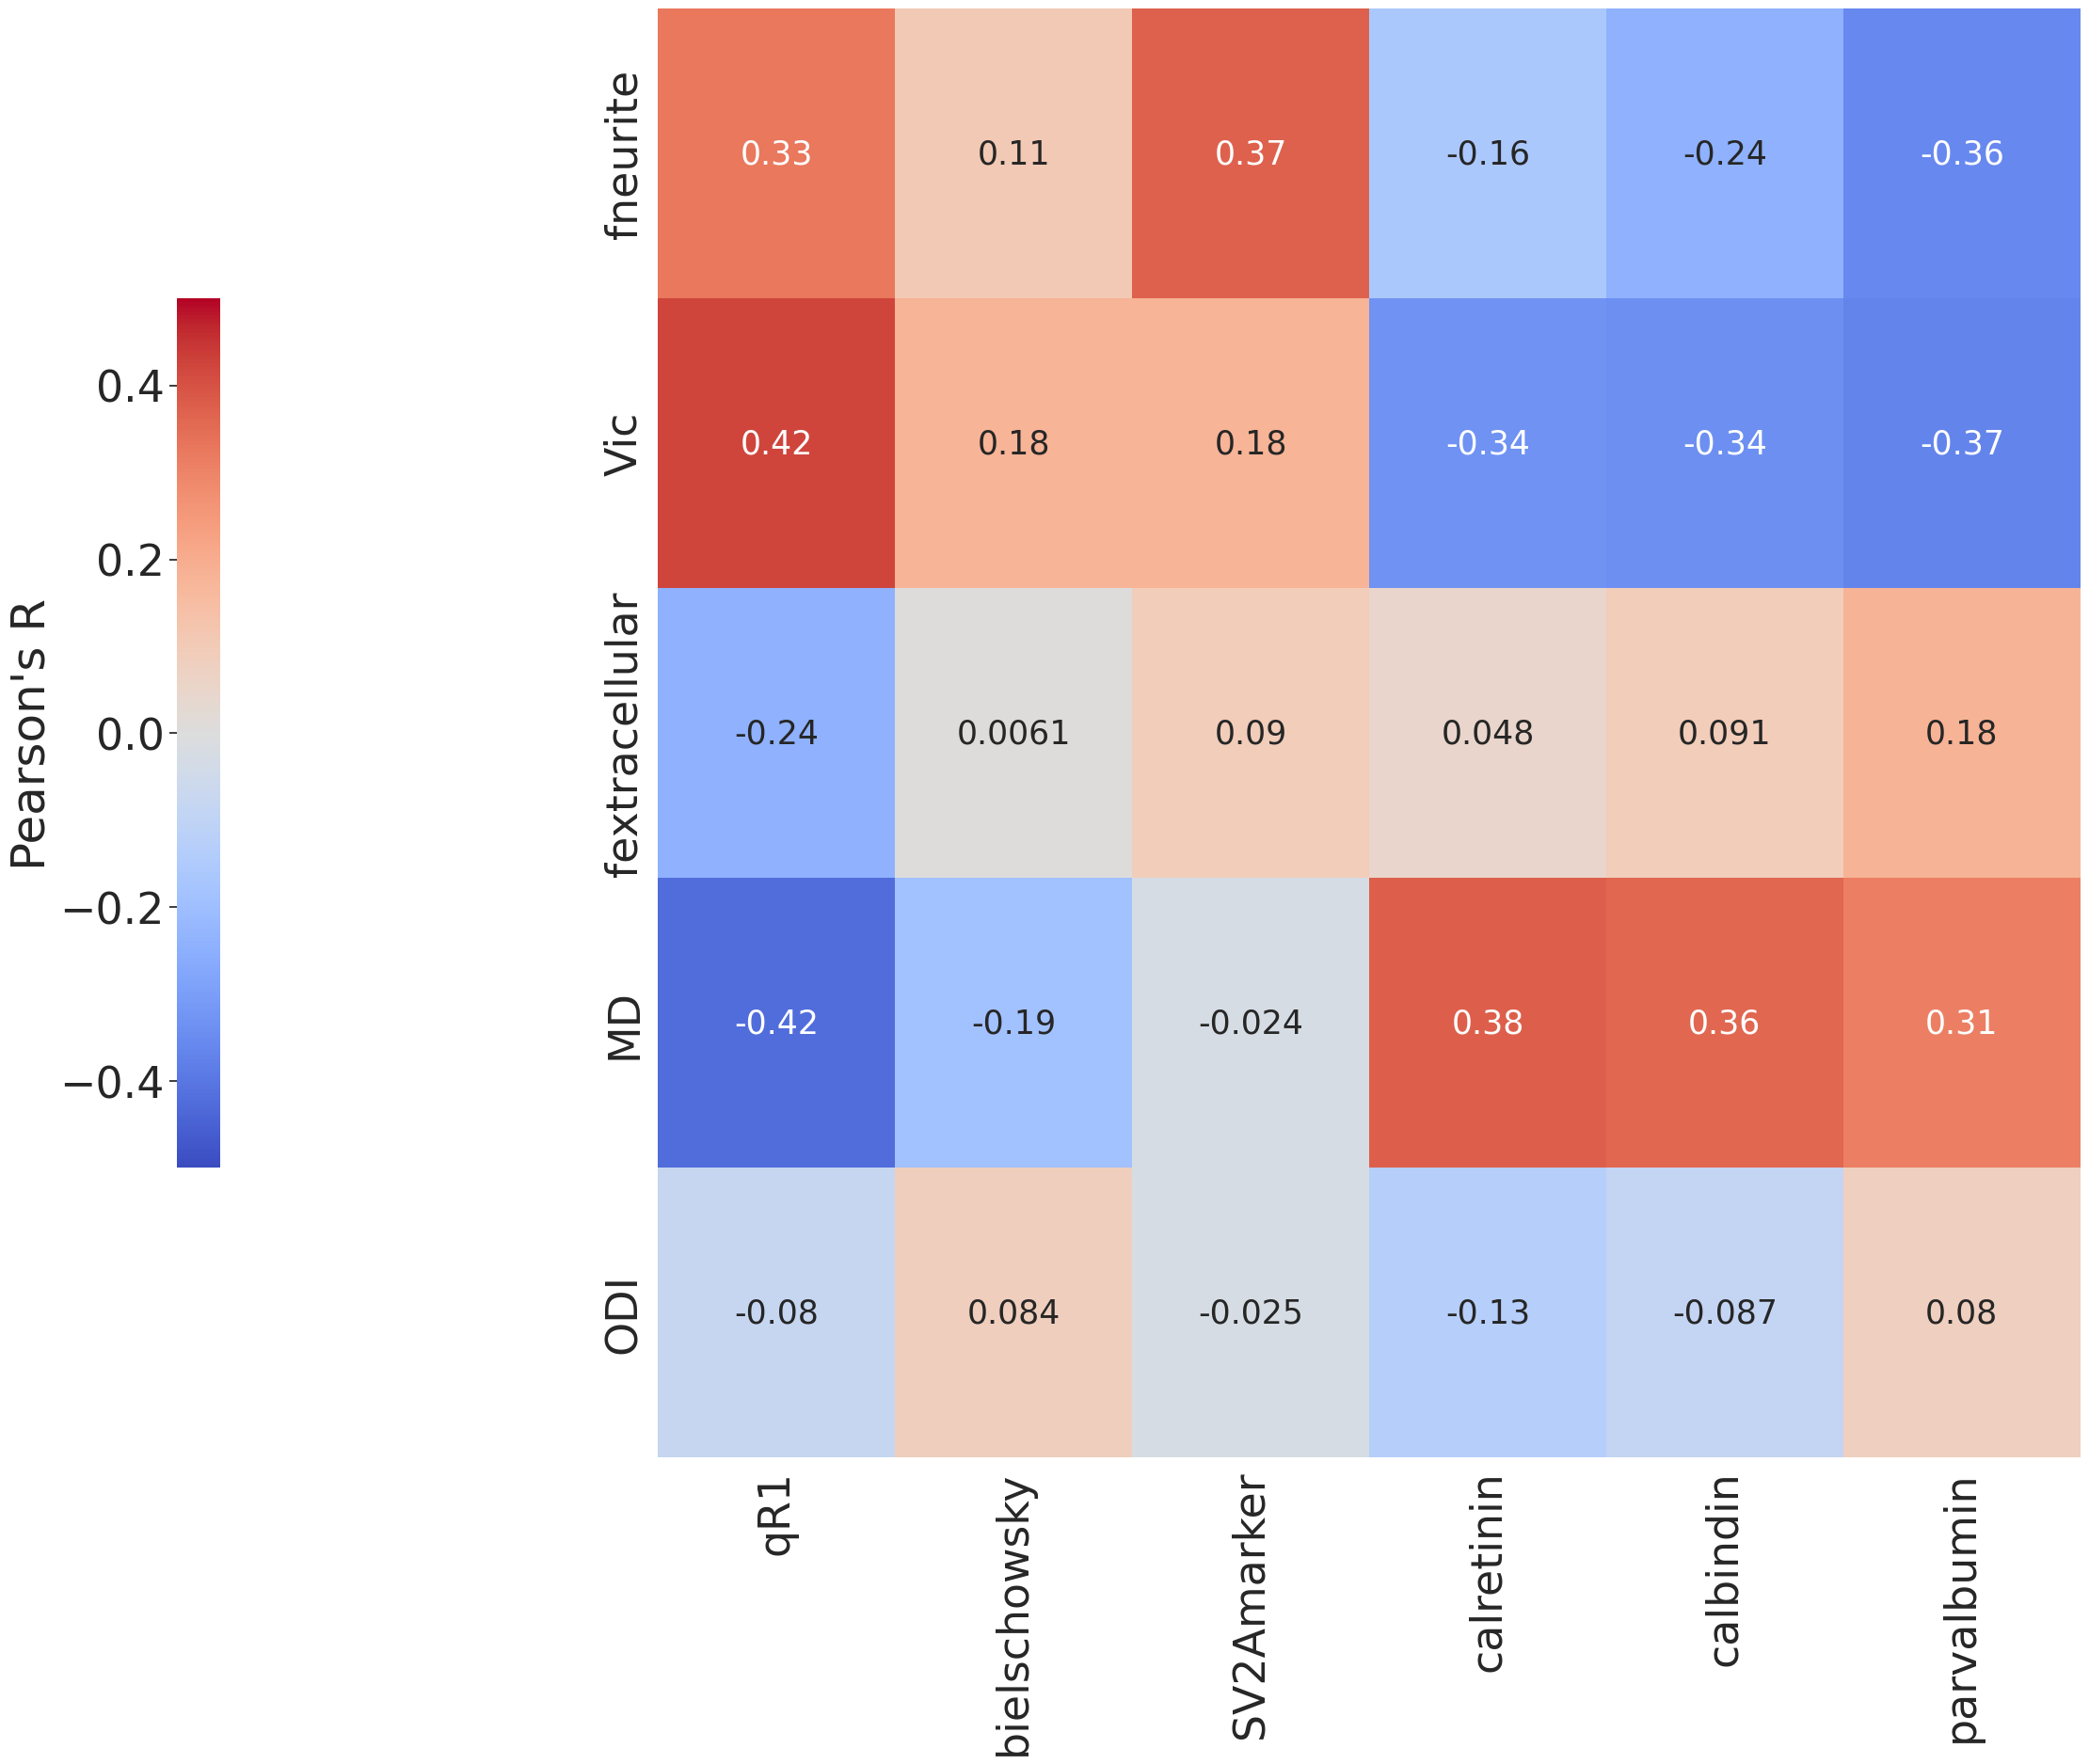

In [26]:
import seaborn as sns

Xlabel = ['fneurite','Vic','fextracellular','MD','ODI']
Ylabel = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']


f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=3)
ax = sns.heatmap(robsall.T,annot=True,vmax=0.5,vmin=-0.5,xticklabels=Ylabel, yticklabels=Xlabel,square=False,cbar_kws={"orientation": "vertical","location":"left", "pad":0.2,'label':"Pearson's R",'shrink':0.6},annot_kws={"size": 25},cmap='coolwarm')

In [23]:
pall.shape

(6, 5)

In [18]:
from statsmodels.stats.multitest import fdrcorrection

fdrcorrection([1.333675e-10,0.102814,0.0343,0.000049,0.001364,0.000416])[1]

array([8.00205e-10, 1.02814e-01, 4.11600e-02, 1.47000e-04, 2.04600e-03,
       8.32000e-04])

In [28]:
from statsmodels.stats.multitest import fdrcorrection
from statsmodels.stats.multitest import multipletests

fdrcorrpval = np.empty((pall.shape))
for ii in range(pall.shape[1]):
    fdrcorrpval[:,ii] = fdrcorrection(pall[:,ii])[1]


Text(0.5, 1.0, 'FDR corrected pvals')

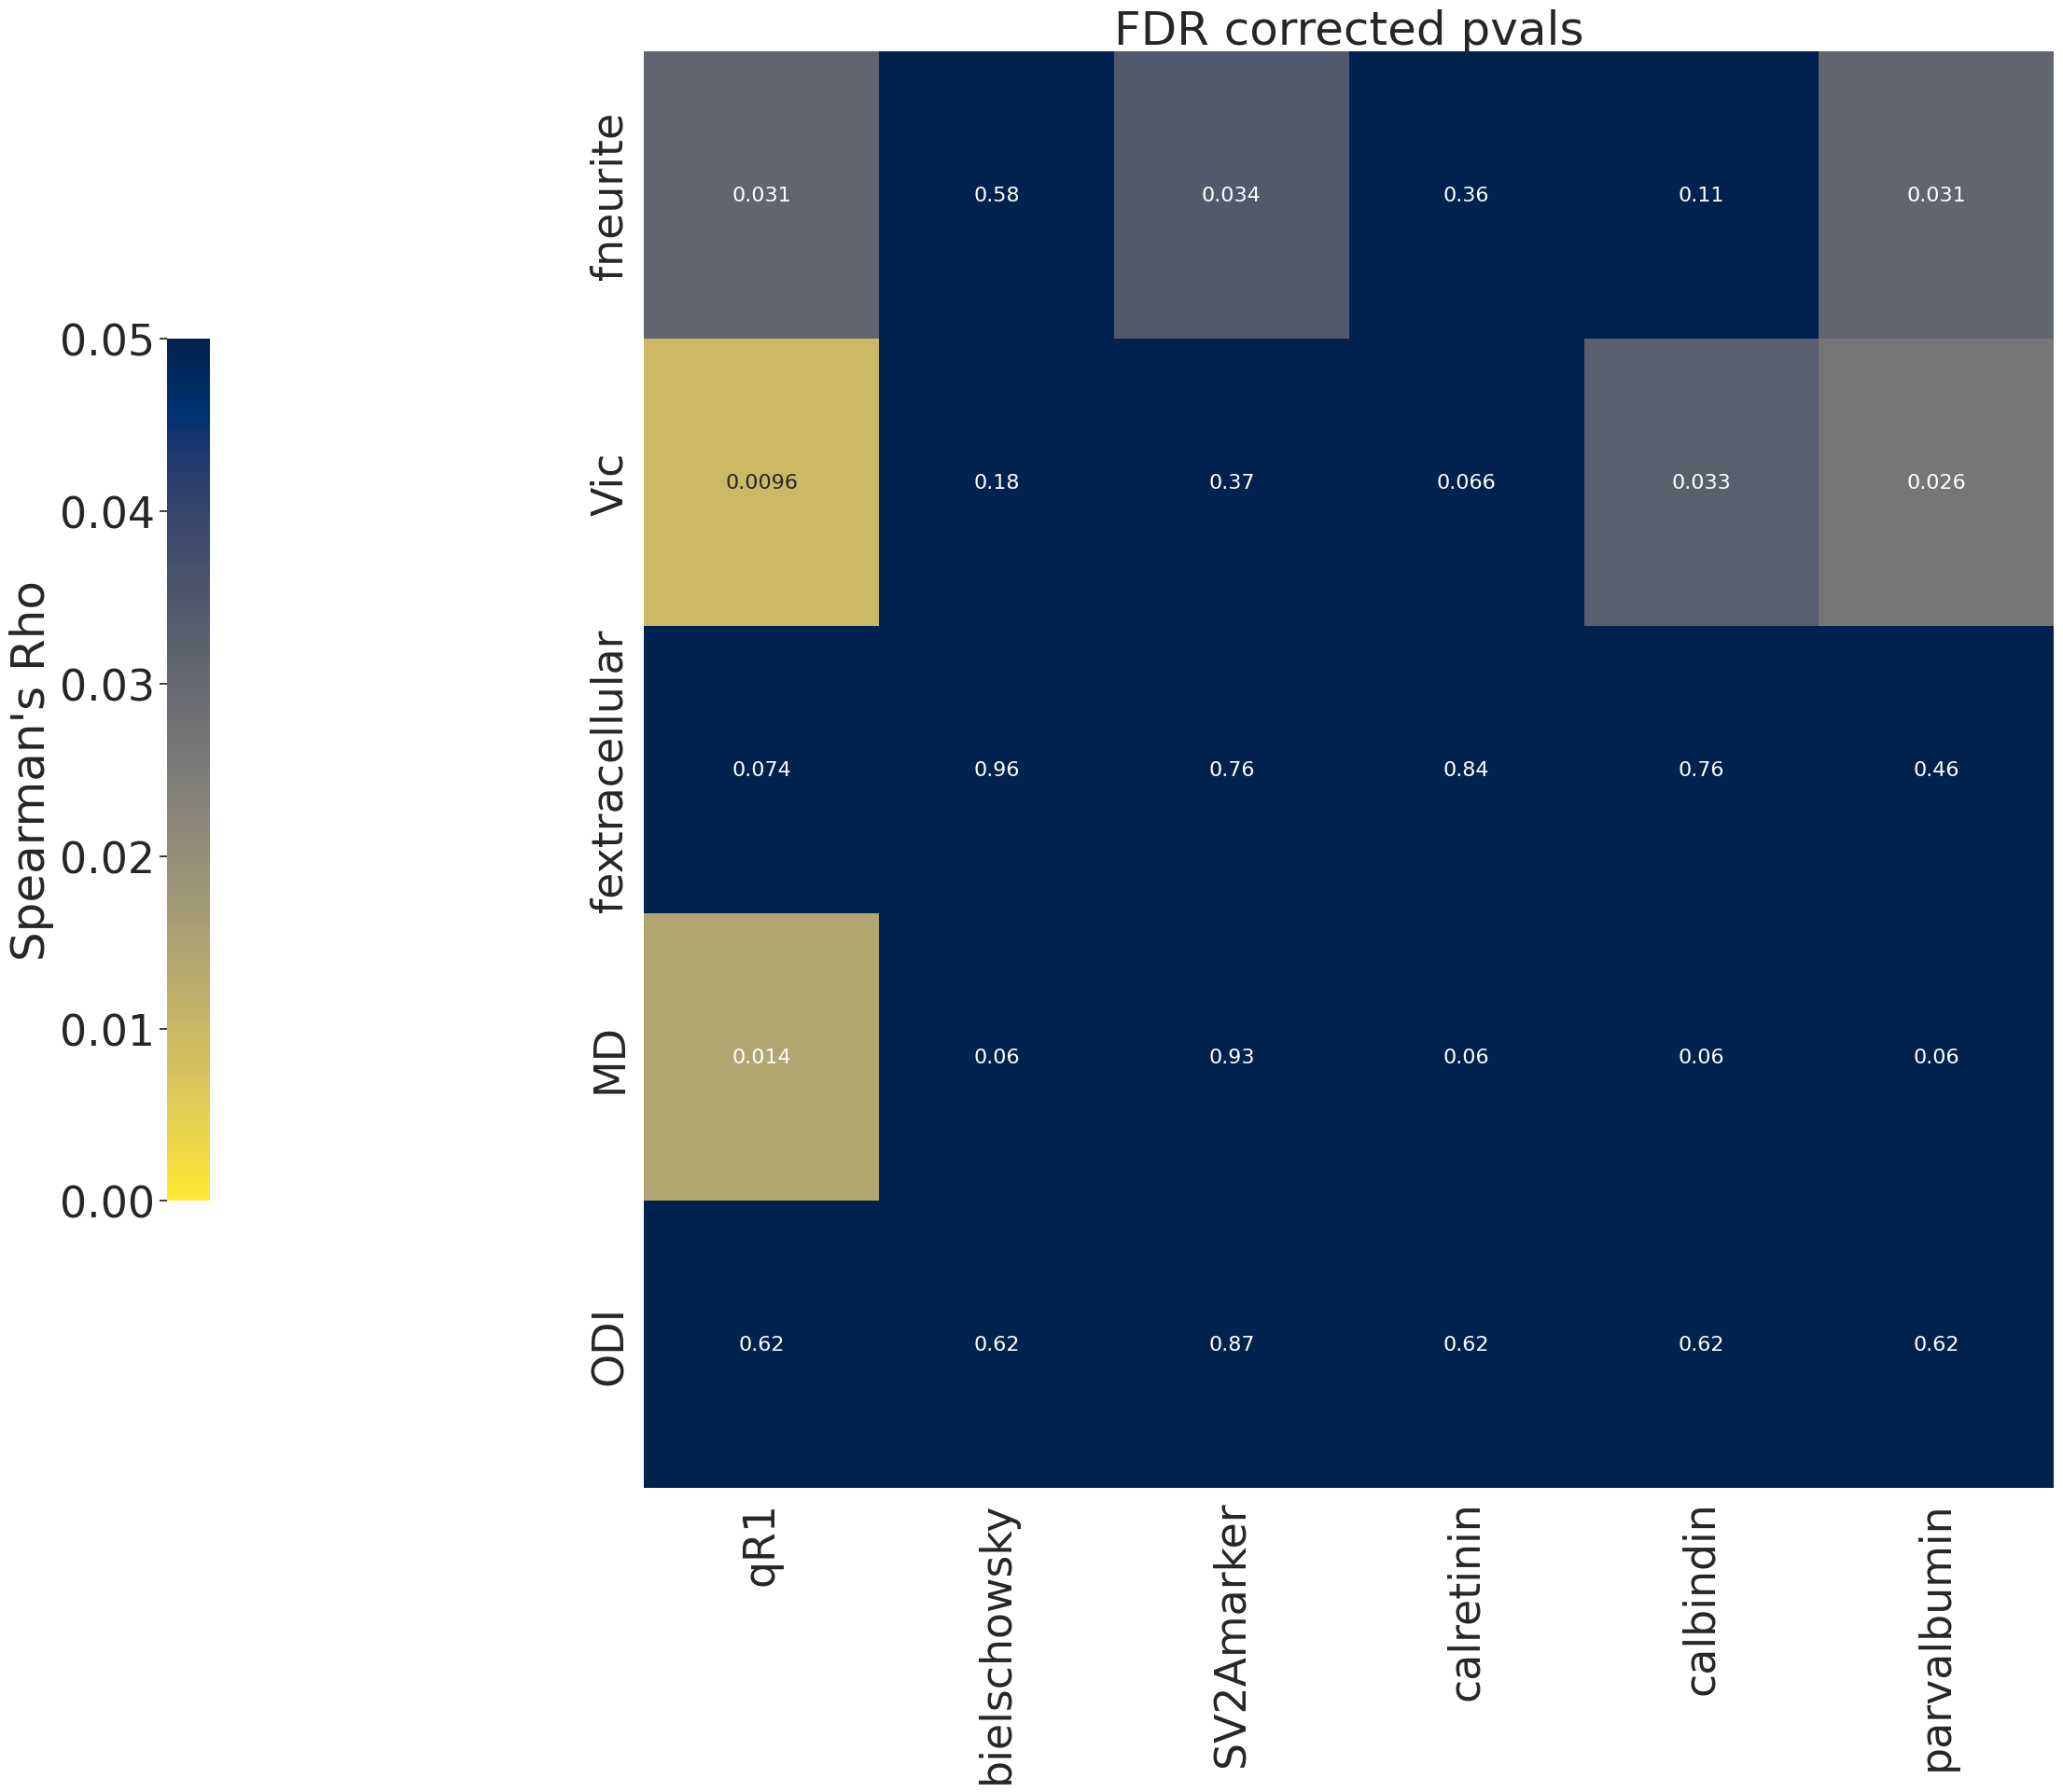

In [29]:
import seaborn as sns

xlabel = ['fneurite','fextracellular','MD','AP','IO']
ylabel = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']


f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=3)
ax = sns.heatmap(fdrcorrpval.T,annot=True,vmax=0.05,vmin=0,xticklabels=Ylabel, yticklabels=Xlabel,square=False,cbar_kws={"orientation": "vertical","location":"left", "pad":0.2,'label':"Spearman's Rho",'shrink':0.6},annot_kws={"size": 16},cmap='cividis_r')
plt.title('FDR corrected pvals')

Text(0.5, 1.0, 'uncorrected pvals')

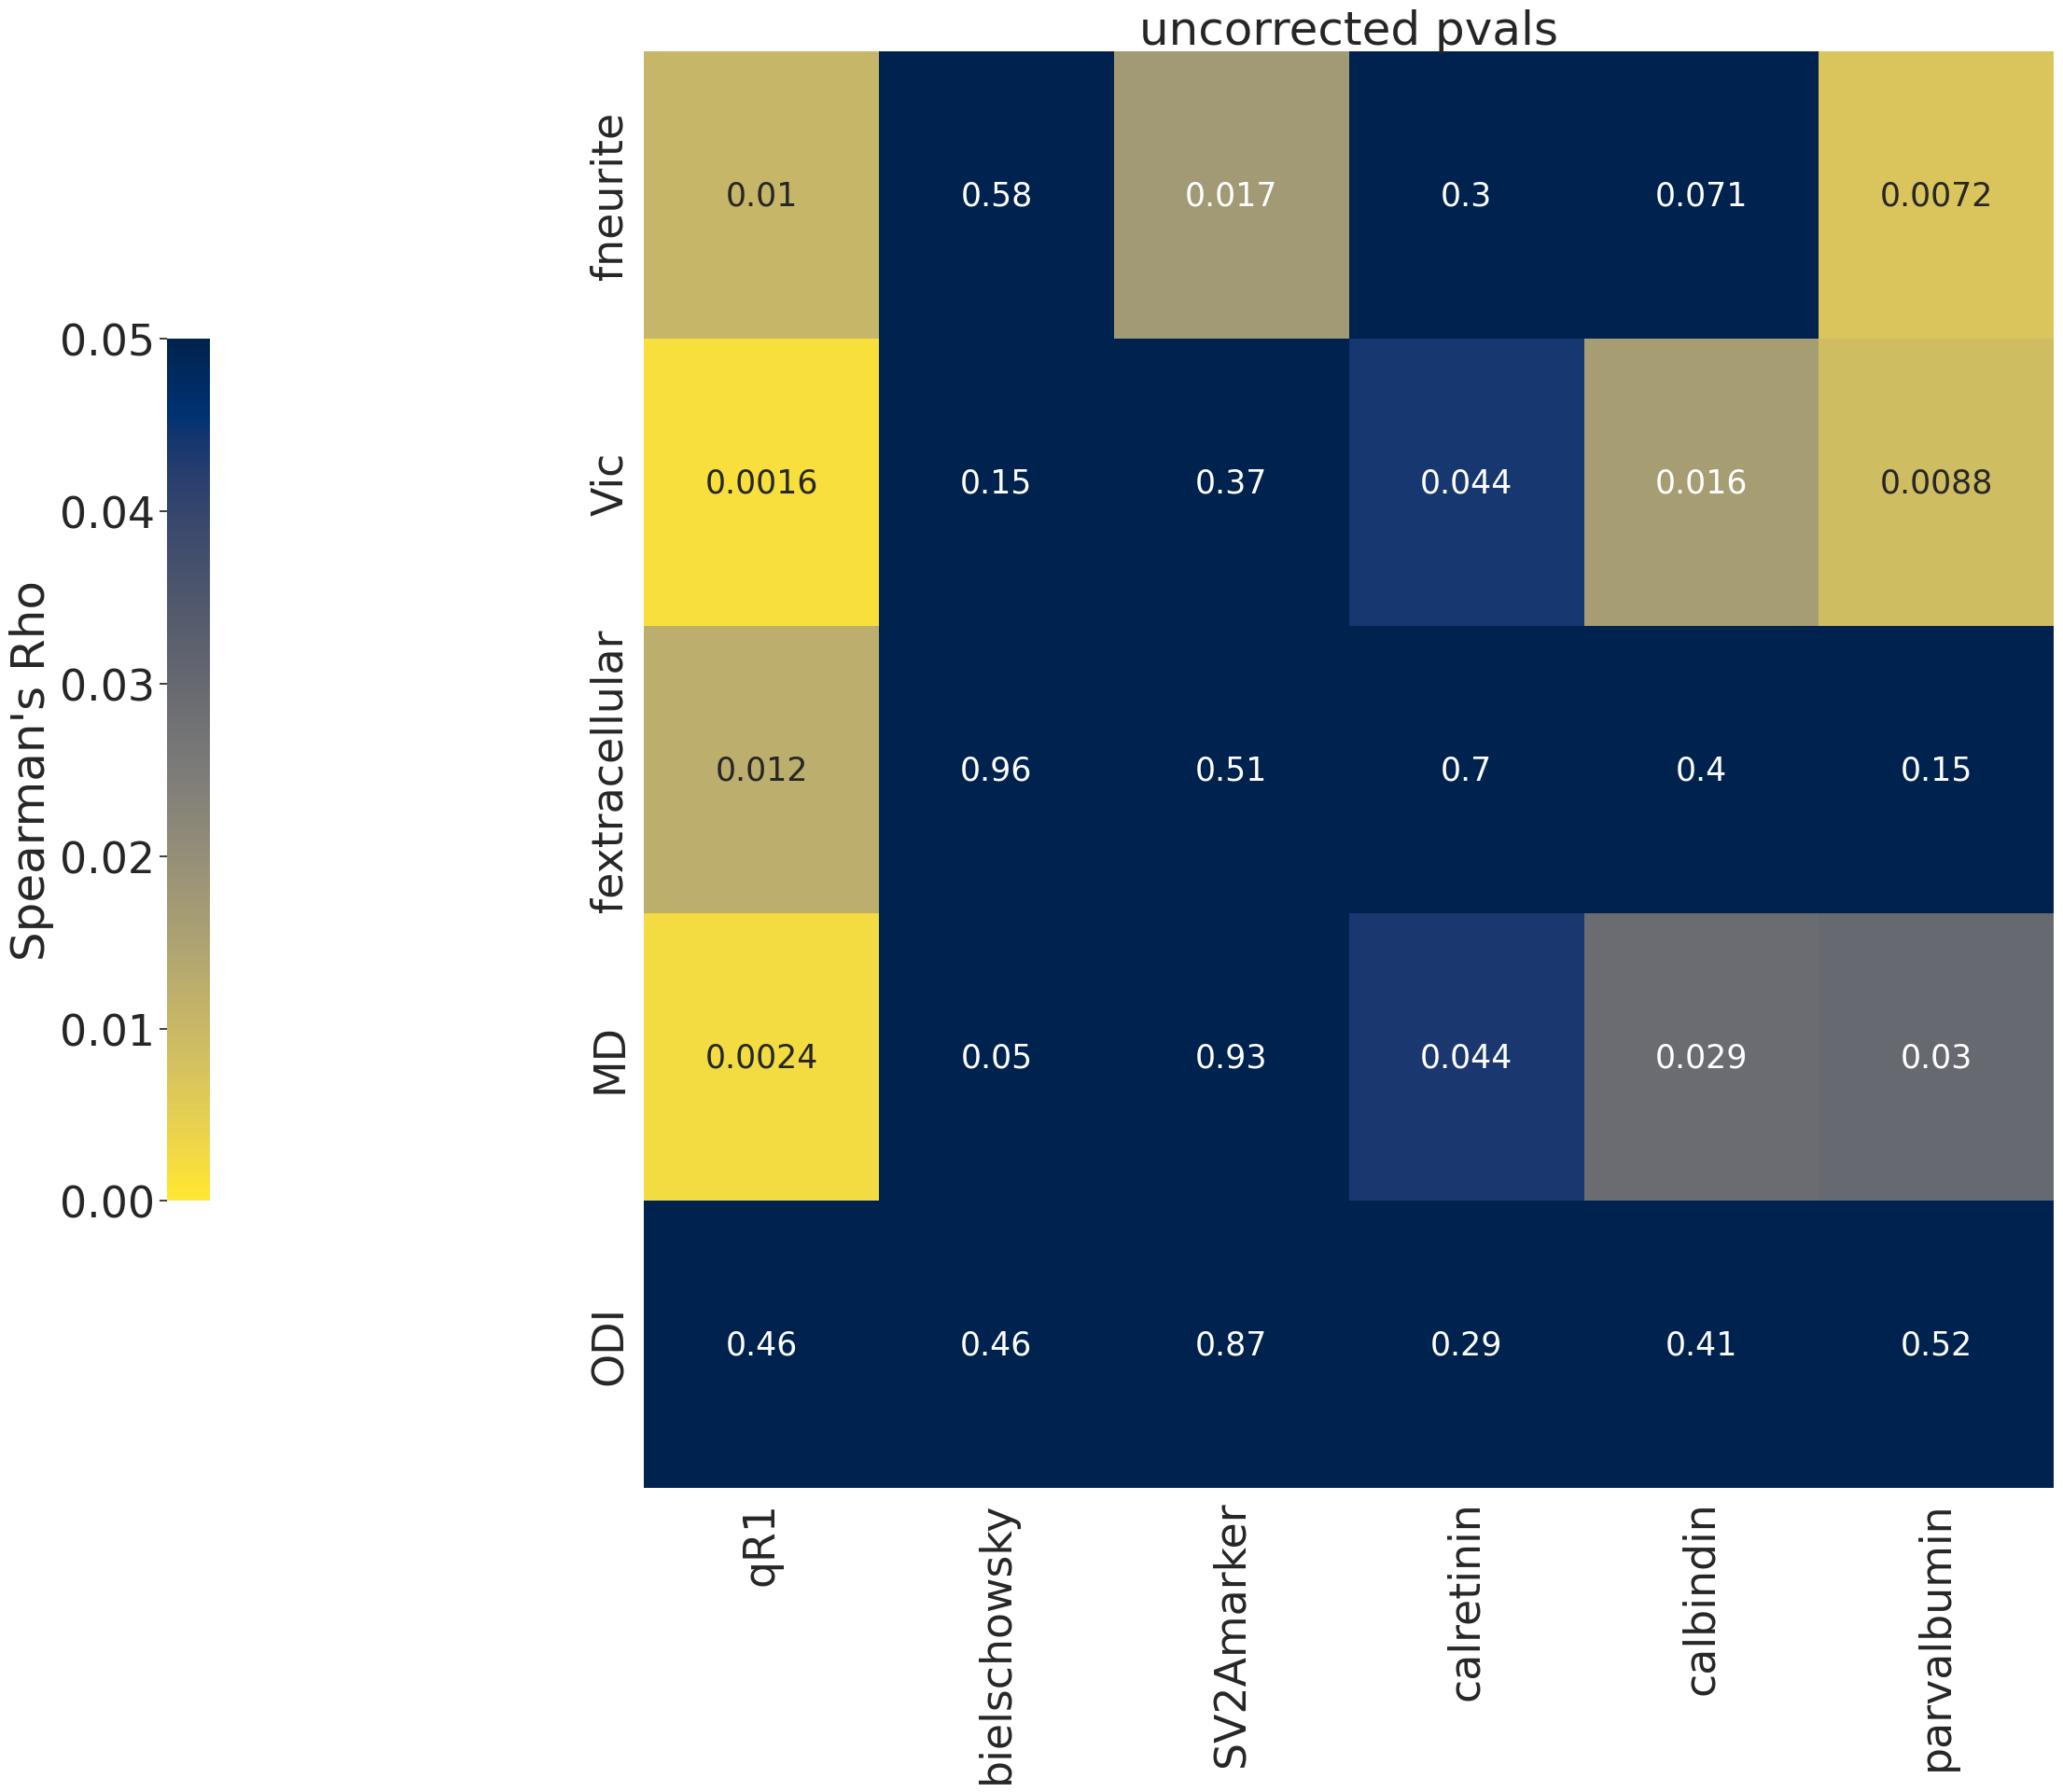

In [30]:
import seaborn as sns

Xlabel = ['fneurite','Vic','fextracellular','MD','ODI']
Ylabel = ['qR1','bielschowsky','SV2Amarker','calretinin','calbindin','parvalbumin']


f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=3)
ax = sns.heatmap(pall.T,annot=True,vmax=0.05,vmin=0,xticklabels=Ylabel, yticklabels=Xlabel,square=False,cbar_kws={"orientation": "vertical","location":"left", "pad":0.2,'label':"Spearman's Rho",'shrink':0.6},annot_kws={"size": 25},cmap='cividis_r')
plt.title('uncorrected pvals')

# Correlating all t-stat metrics with AP-PD gradients

In [ ]:
metrics = ['fneurite','fsoma','fe','R','ODI','wic','b500_1200_MD','gyrification','thickness','AP','PD','IO']
metrichold = np.empty((7262,len(metrics)))

for ii in range(len(metrics)):
        metrichold[:,ii] = nib.load(f'/redacted/path/{metrics[ii]}_hemi-combined_model-age-sex-interact_contrast-age_desc-tvalue.shape.gii').agg_data()

/cubric/data/c23087627/miniconda3/envs/venv_all/lib/python3.9/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


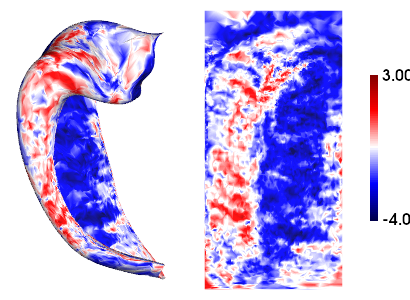

In [8]:
plotting.surfplot_canonical_foldunfold(metrichold[:,6],color_range=(-4,3),color_bar=('right'),hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='seismic', tighten_cwindow=False, embed_nb=True)

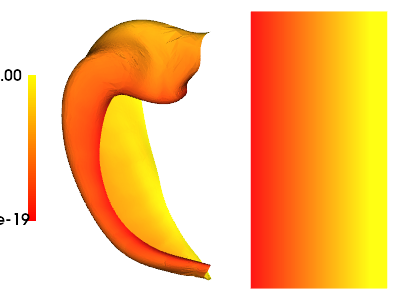

In [ ]:
from numpy.matlib import repmat
AP,_,_ = utils.density_interp('unfoldiso','0p5mm',repmat(np.linspace(1,0,254),126,1).flatten(), label='hipp')
PD,_,_ = utils.density_interp('unfoldiso','0p5mm',repmat(np.linspace(1,0,126),254,1).T.flatten(), label='hipp')
plotting.surfplot_canonical_foldunfold(PD, color_bar=('left'), hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='autumn', tighten_cwindow=False, embed_nb=True)

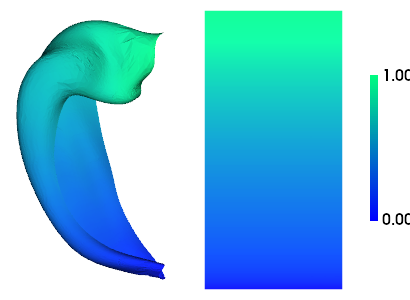

In [ ]:
plotting.surfplot_canonical_foldunfold(AP, color_bar=('right'), hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='winter', tighten_cwindow=False, embed_nb=True)

### Correlation of each t-statistic map with gradients

In [ ]:
import scipy as sp
APgradientcorr = np.empty((len(metrics)))
PDgradientcorr = np.empty((len(metrics)))

for ii in range(len(metrics)):
    APgradientcorr[ii] = np.abs(sp.stats.pearsonr(AP,metrichold[:,ii]))[0]
    PDgradientcorr[ii] = np.abs(sp.stats.pearsonr(PD,metrichold[:,ii]))[0]

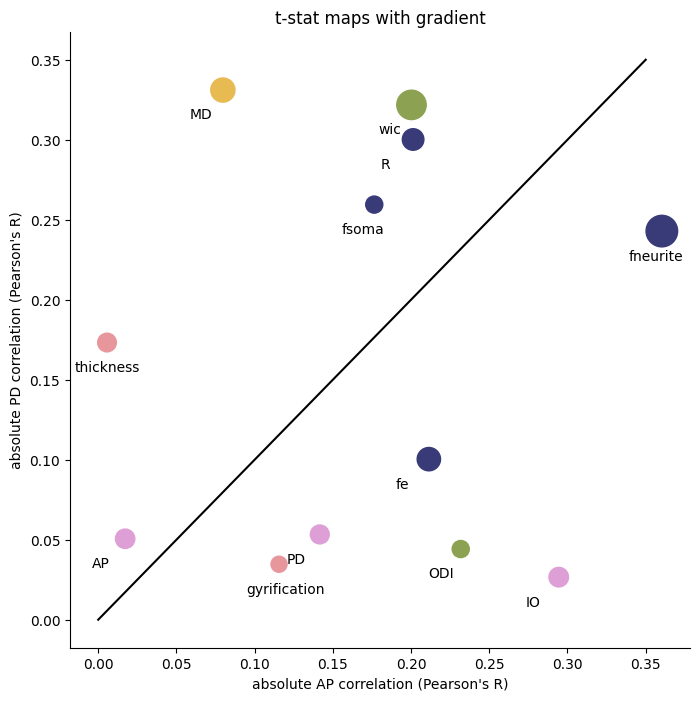

In [ ]:
X = np.linspace(0,0.35,1000)
Y = np.linspace(0,0.35,1000)

colors = [1,1,1,1,2,2,3,4,4,5,5,5] #SANDI, NODDI, DTI, macrostructure, direction
psize = np.mean(np.abs(metrichold[:,:]),axis=0) * 200 #point size is given by absolute t-stat map (i.e. how much that metric changes across age)
fig, ax = plt.subplots(figsize=(8,8))
ax.spines[['right', 'top']].set_visible(False)
ax.scatter(APgradientcorr,PDgradientcorr, c=colors, cmap='tab20b', s=psize)
ax.plot(X,Y,color='black')
#ax.set_xlim([-0.01, 0.40])
#ax.set_ylim([-0.01, 0.40])
plt.xlabel("absolute AP correlation (Pearson's R)")
plt.ylabel("absolute PD correlation (Pearson's R)")
plt.title('t-stat maps with gradient')

for ii,metric in enumerate(metrics):
    ax.annotate(str(metric), (APgradientcorr[ii]-.021, PDgradientcorr[ii]-.018))
    